In [193]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

/kaggle/input/titanic/titanic_dataset.csv


### Load Dataset

In [194]:
df_data = pd.read_csv('/kaggle/input/titanic/titanic_dataset.csv')


In [195]:
df=df_data.copy()
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [196]:
df.shape

(12970, 15)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12682 non-null  object 
 3   CryoSleep     12660 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12696 non-null  object 
 6   Age           12700 non-null  float64
 7   VIP           12674 non-null  object 
 8   RoomService   12707 non-null  float64
 9   FoodCourt     12681 non-null  float64
 10  ShoppingMall  12664 non-null  float64
 11  Spa           12686 non-null  float64
 12  VRDeck        12702 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 1.4+ MB


In [198]:
numeric_columns = ['Age', 'RoomService', 'FoodCourt','Spa', 'ShoppingMall', 'VRDeck']

## Step 1: Define the Problem


here are 12 feature columns. Using these features your model has to predict whether the passenger is rescued or not indicated by the column Transported.

In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [200]:
df.describe()

,Unnamed: 0,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,3617.887741,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,2408.607419,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1621.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3242.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5449.750000,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [201]:
df.nunique()

Unnamed: 0       8693
PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

In [202]:
#text
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [203]:
#categorik
df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [204]:
df['VIP'].unique()

array([False, True, nan], dtype=object)

**Step 3: Preprocess the Data**
****

###dropped PassengerId,Nmae,Unnamed columns

In [205]:
df =df.drop(['PassengerId', 'Name','Unnamed: 0'], axis=1)
df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Bar chart for label column: Transported¶


<Axes: >

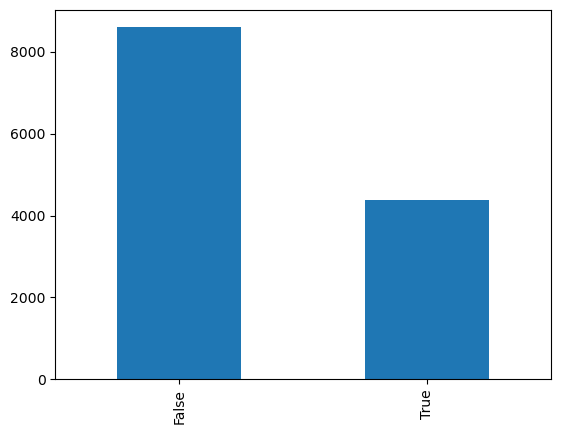

In [206]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

Numerical data distribution¶
Let us plot all the numerical columns and their value counts:




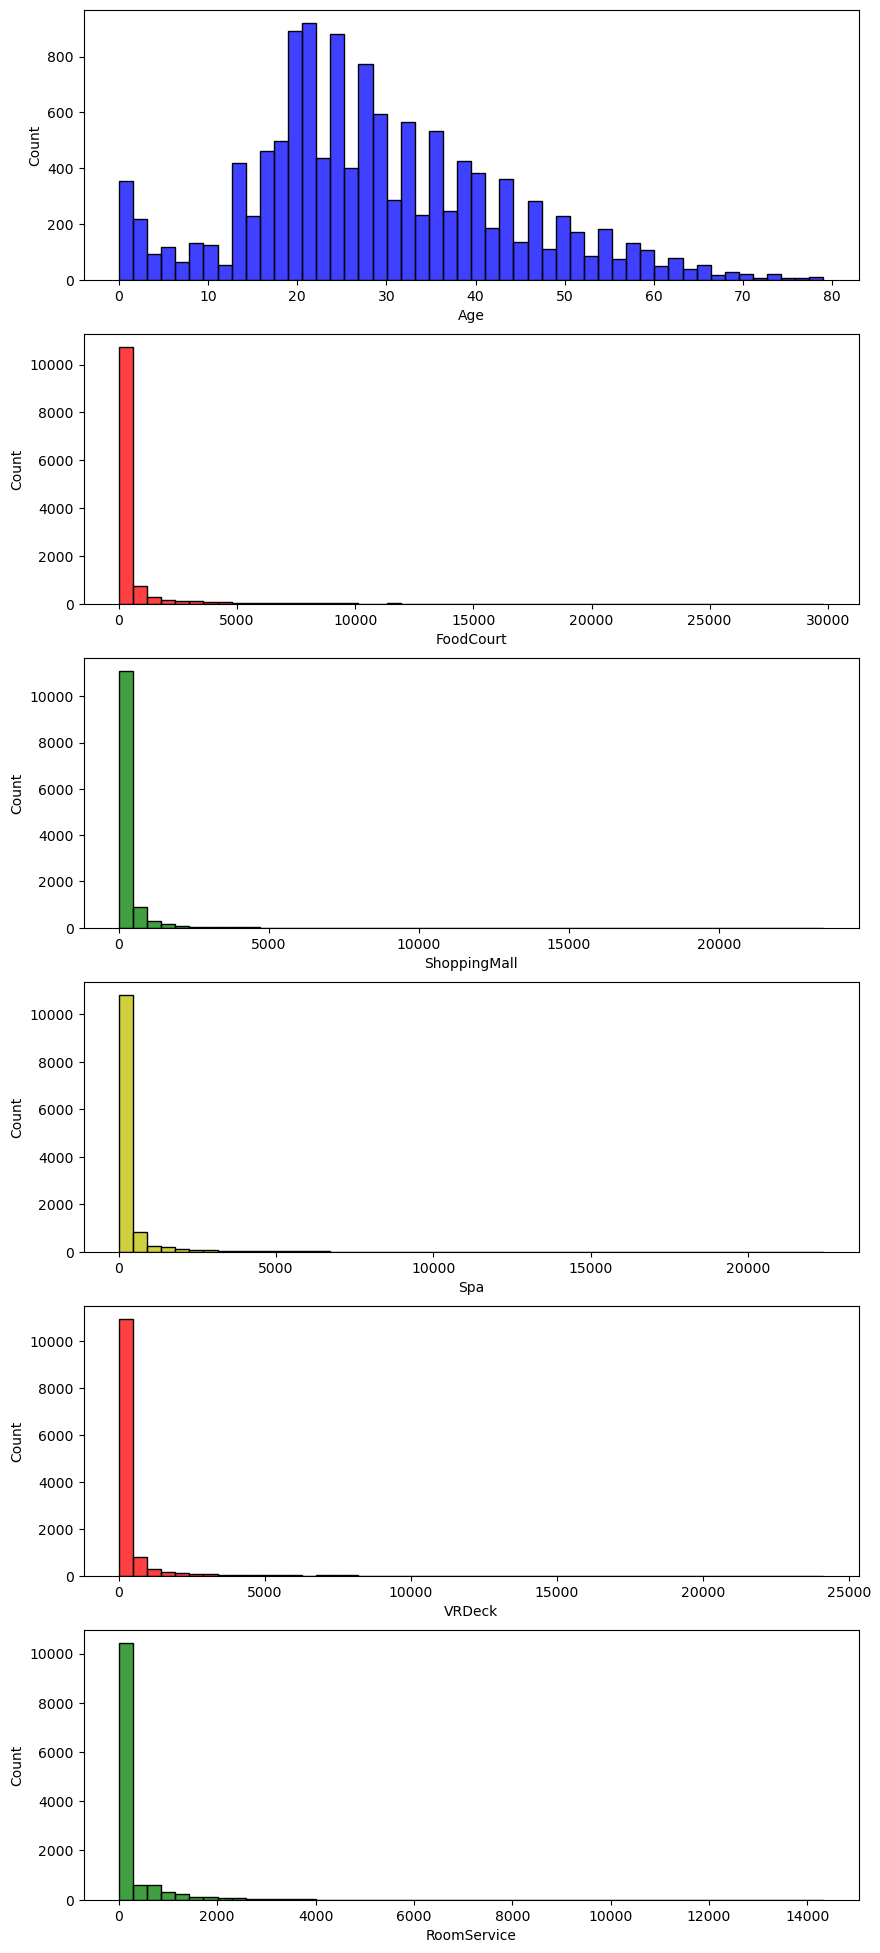

In [207]:
fig, ax = plt.subplots(6,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sb.histplot(df['Age'], color='b', bins=50, ax=ax[0]);
sb.histplot(df['FoodCourt'], color='r', bins=50, ax=ax[1]);
sb.histplot(df['ShoppingMall'], color='g', bins=50, ax=ax[2]);
sb.histplot(df['Spa'], color='y', bins=50, ax=ax[3]);
sb.histplot(df['VRDeck'], color='r', bins=50, ax=ax[4]);
sb.histplot(df['RoomService'], color='g', bins=50, ax=ax[5]);

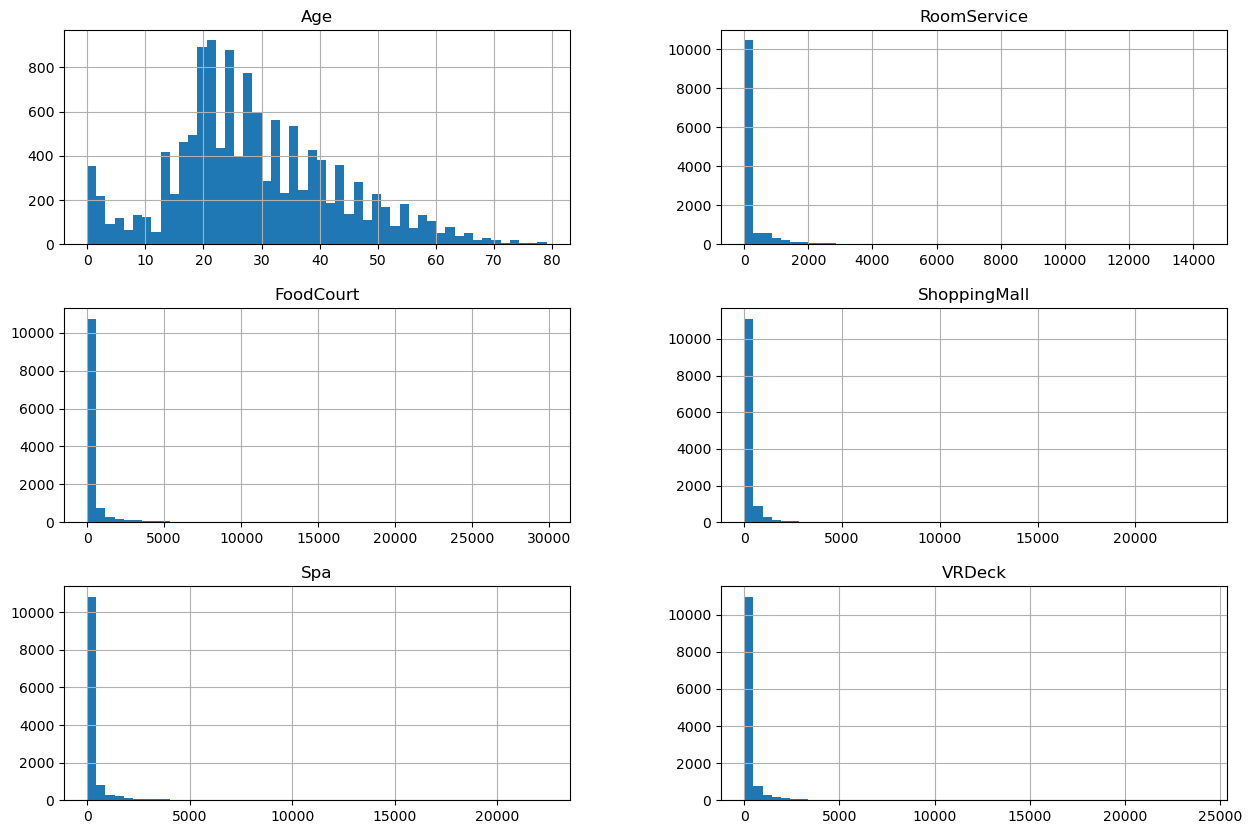

In [208]:
#alternatif
df.hist(bins=50,figsize=(15,10));

missing values

In [209]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

      HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
272        Earth      True       NaN    TRAPPIST-1e  16.0  False          0.0   
317        Earth      True       NaN    TRAPPIST-1e  18.0  False          0.0   
466       Europa      True    B/19/S    55 Cancri e  18.0  False          0.0   
470       Europa      True    B/19/S    55 Cancri e  18.0  False          0.0   
616       Europa      True    C/25/S    55 Cancri e  30.0  False          0.0   
617       Europa      True    C/25/S    55 Cancri e  30.0  False          0.0   
1362       Earth     False       NaN    TRAPPIST-1e   0.0  False          0.0   
2083        Mars      True   F/448/P    55 Cancri e  20.0  False          0.0   
2084        Mars      True   F/448/P    55 Cancri e  20.0  False          0.0   
3026      Europa      True   C/123/S    TRAPPIST-1e  28.0  False          0.0   
3027      Europa      True   C/123/S    TRAPPIST-1e  28.0  False          0.0   
3275       Earth      True  

In [210]:
df = df.drop_duplicates()

In [211]:
df.isnull().sum()

HomePlanet      288
CryoSleep       310
Cabin           288
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Transported       0
dtype: int64

In [212]:
df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

In [213]:
df.isnull().sum()

HomePlanet      288
CryoSleep         0
Cabin           288
Destination     274
Age             270
VIP               0
RoomService     263
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [214]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

HomePlanet' : 2.23%
Cabin' : 2.23%
Destination' : 2.12%
Age' : 2.09%
RoomService' : 2.03%


<BarContainer object of 12 artists>

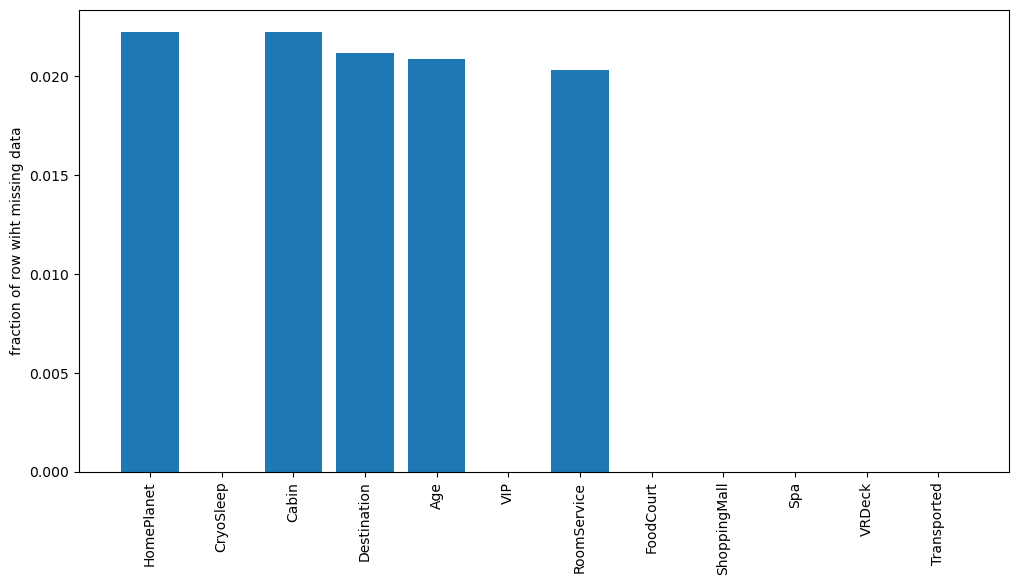

In [215]:
#eksik verileri inceleyen grafik
null_counts=df.isnull().sum()/len(df)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of row wiht missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

****handling missing values
homeplanet...obj
cabin....obj
destination...obj
age...float
roomservice...float

In [216]:
# Fill missing values in numerical columns with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())

In [217]:
#4. Method
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='most_frequent')
# Fit the imputer on the data and transform it
df['HomePlanet'] = imputer.fit_transform(df[['HomePlanet']])
df['Cabin'] = imputer.fit_transform(df[['Cabin']])
df['Destination'] = imputer.fit_transform(df[['Destination']])

In [218]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

**** Transform categorical variables into numerical representations 

In [219]:
df['VIP'].unique()

array([False, True], dtype=object)

In [220]:
df['CryoSleep'].unique()

array([False, True], dtype=object)

In [221]:
df['Transported'].unique()

array([False,  True])

In [222]:
df['VIP'] = df['VIP'].replace({True: 1, False: 0})
df['CryoSleep'] = df['CryoSleep'].replace({True: 1, False: 0})
df['Transported'] = df['Transported'].replace({True: 1, False: 0})

In [223]:
#encoded_df = pd.get_dummies(df, columns=['VIP', 'CryoSleep','Transported'])

In [224]:
#encoded_df

In [225]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [226]:
df1=df.copy()

****outliers detection

In [227]:
df1.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12942 entries, 0 to 12969
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12942 non-null  object 
 1   CryoSleep     12942 non-null  int64  
 2   Cabin         12942 non-null  object 
 3   Destination   12942 non-null  object 
 4   Age           12942 non-null  float64
 5   VIP           12942 non-null  int64  
 6   RoomService   12942 non-null  float64
 7   FoodCourt     12942 non-null  float64
 8   ShoppingMall  12942 non-null  float64
 9   Spa           12942 non-null  float64
 10  VRDeck        12942 non-null  float64
 11  Transported   12942 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.3+ MB


In [229]:
numeric_columns = ['Age', 'RoomService', 'FoodCourt','Spa', 'ShoppingMall', 'VRDeck']
#categorik veriler olmamali,hipotez testi yapilmali

In [230]:
'''import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()'''
### kategorik veriler korelasyonda olmamali

'import matplotlib.pyplot as plt\nplt.figure(figsize=(15,8))\ndataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)\nplt.show()'

In [231]:
numeric_df=df[numeric_columns]

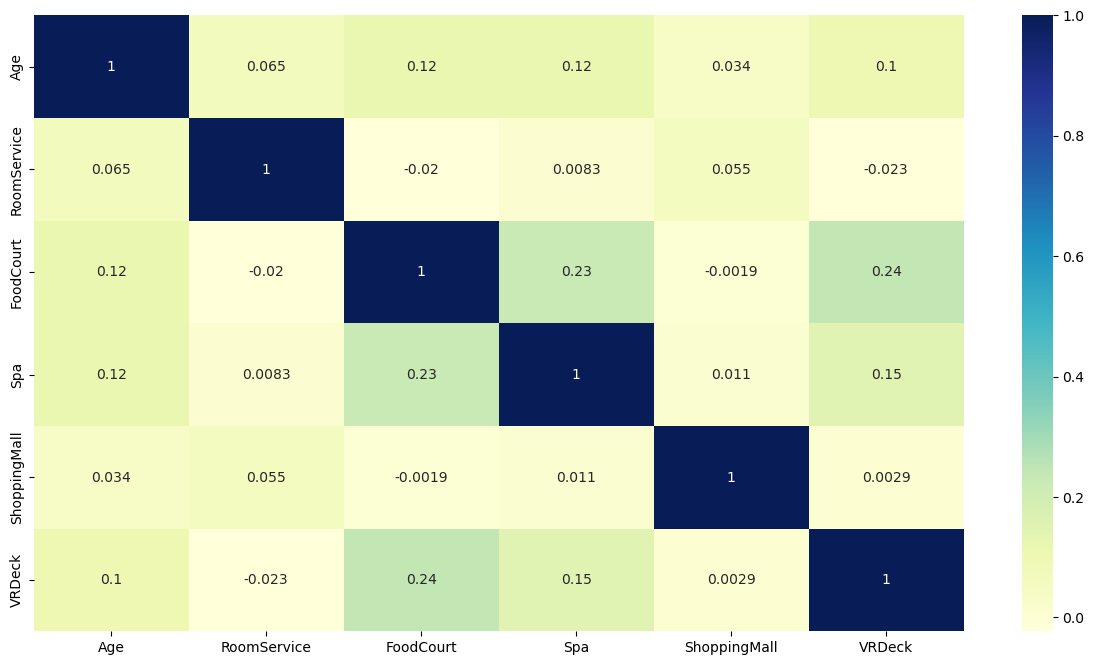

In [232]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
dataplot = sb.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

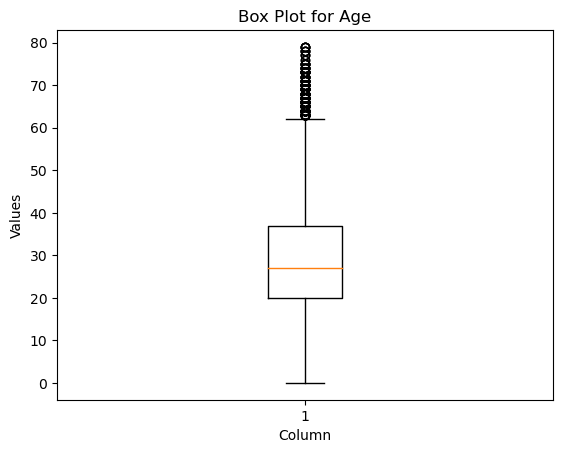

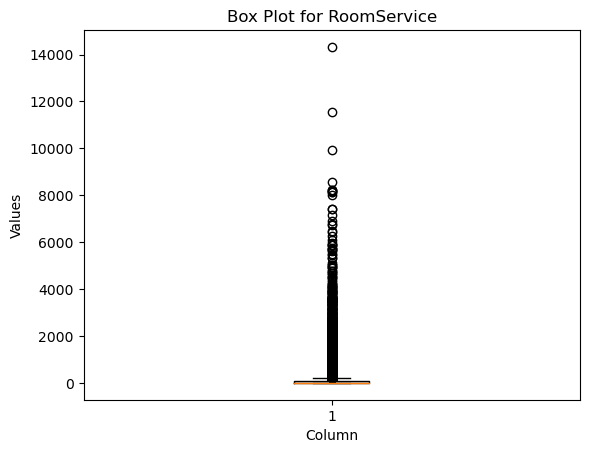

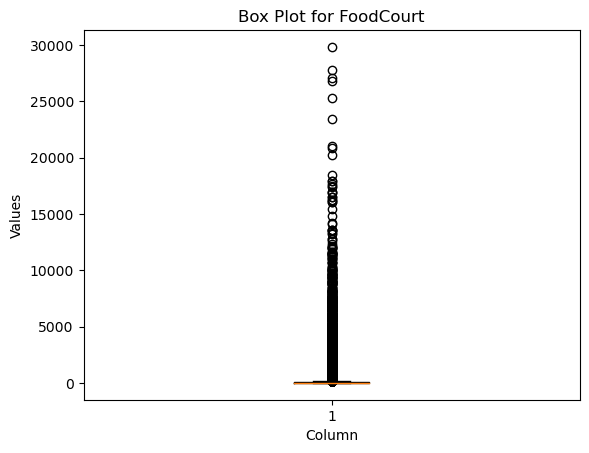

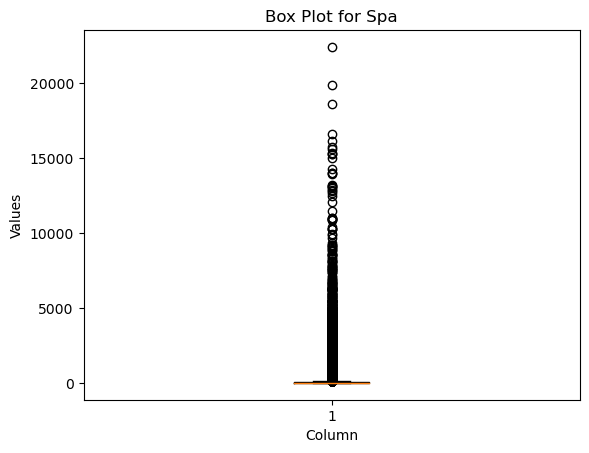

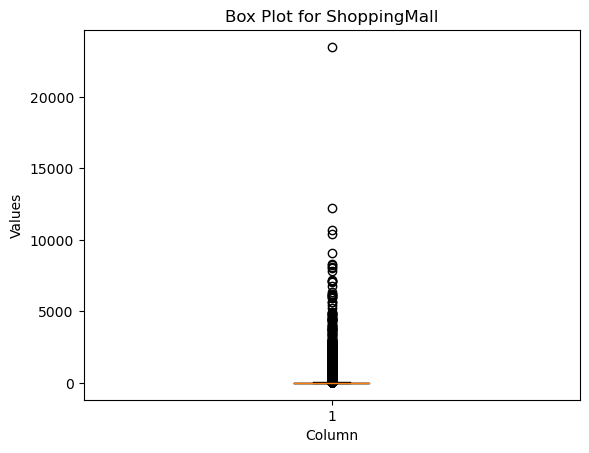

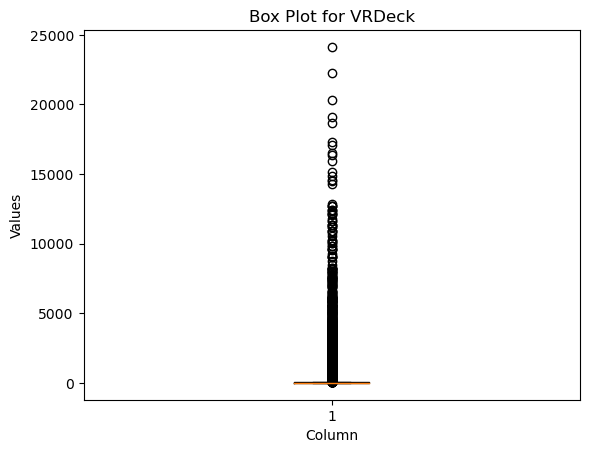

In [233]:

# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [234]:
df2=df1.copy()

In [235]:
z_scores = pd.DataFrame()
for column in numeric_columns:
    z_score = (df2[column] - df2[column].mean()) / df2[column].std()
    z_scores[column] = z_score

# Set the threshold for identifying outliers
z_score_threshold = 3

# Replace the outliers with the mean value of each column
for column in numeric_columns:
    df2[column] = np.where(z_scores[column].abs() > z_score_threshold, df2[column].mean(), df2[column])

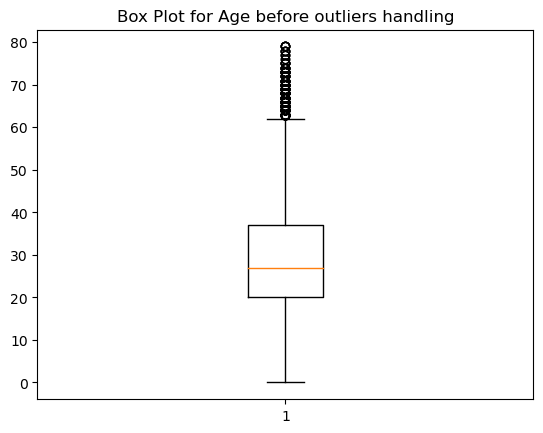

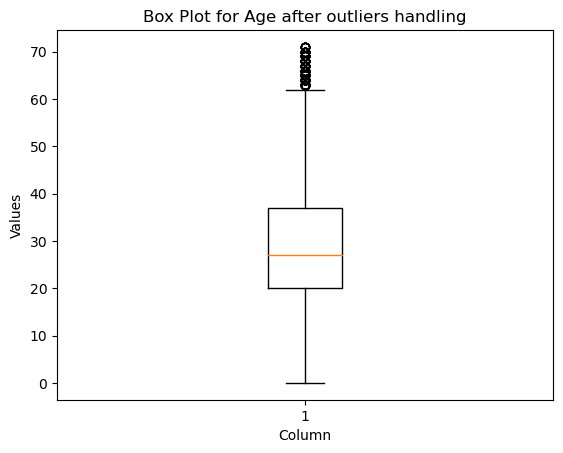

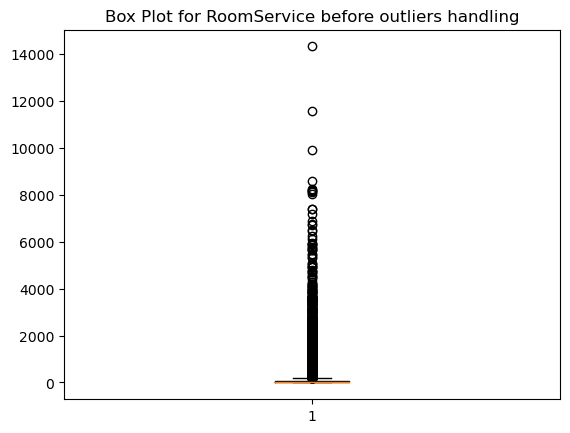

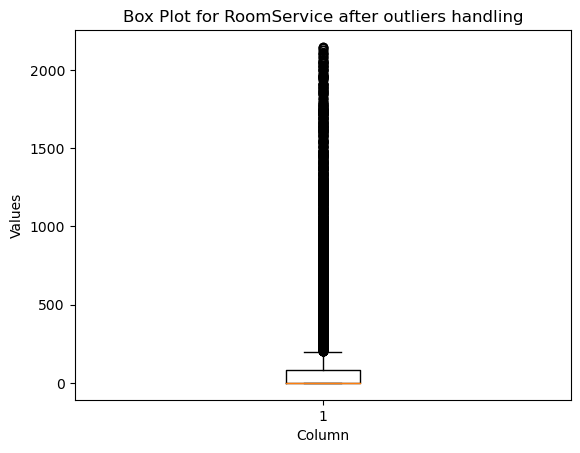

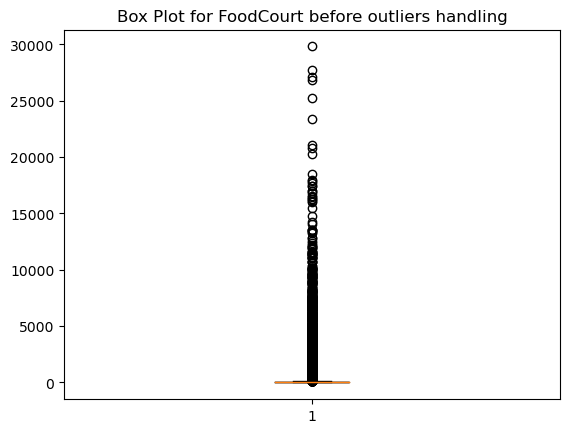

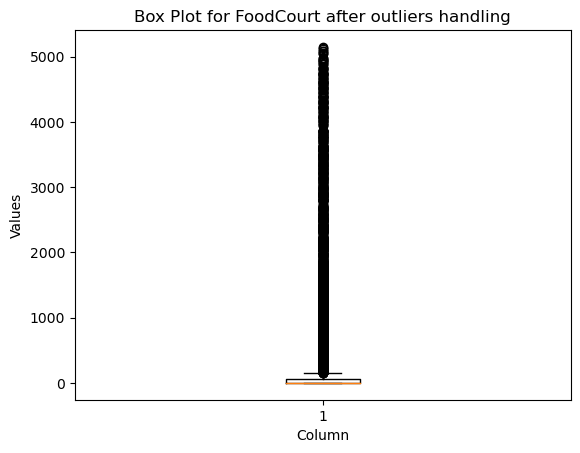

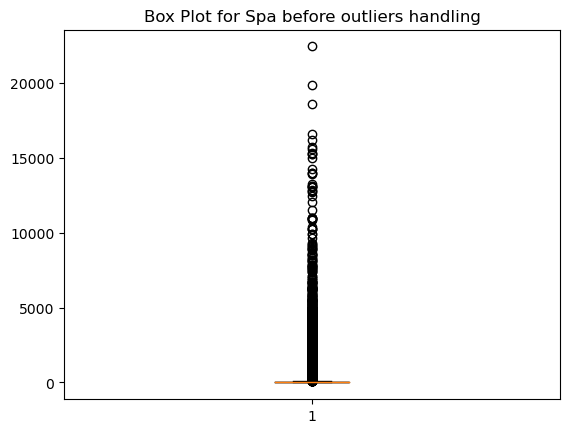

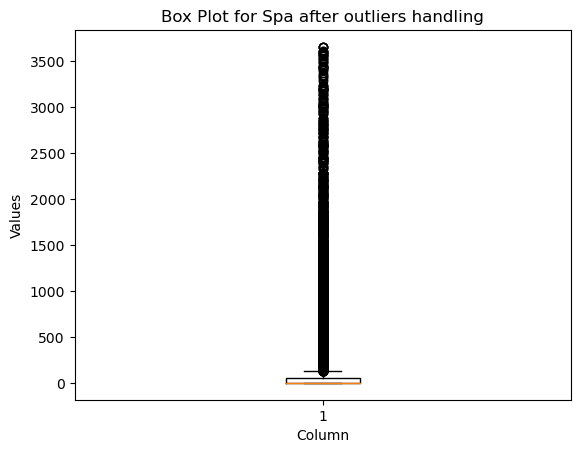

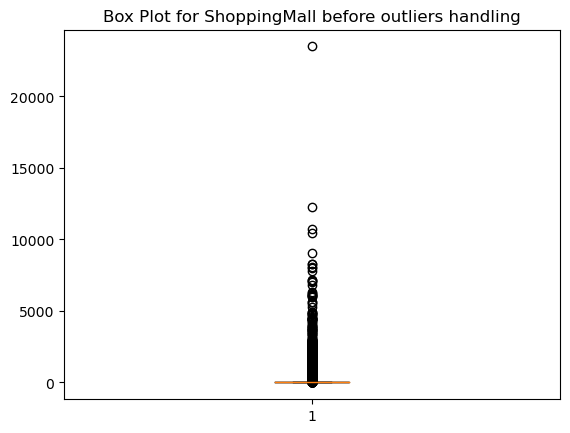

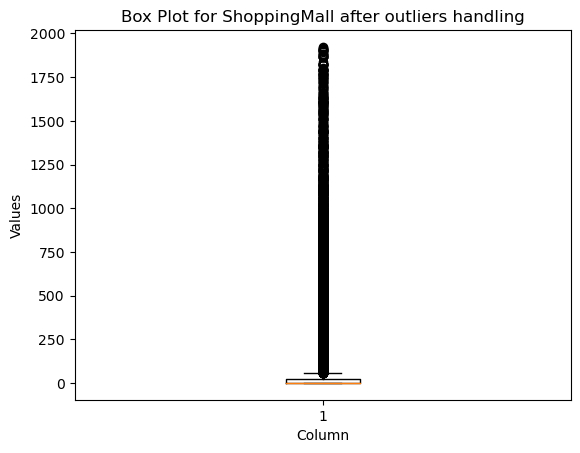

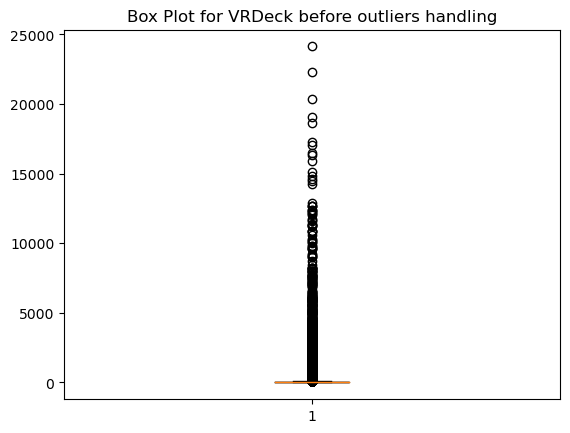

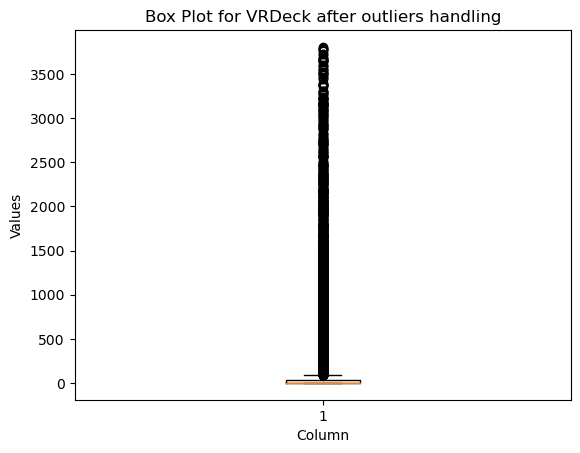

In [236]:
# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure()
    plt.boxplot(df1[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df2[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

### Normality Check

In [237]:
import scipy.stats as stats

# Perform normality tests for each numeric column
for column in numeric_columns:
    data = df2[column].dropna()

    # Shapiro-Wilk test
    shapiro_stat, shapiro_pvalue = stats.shapiro(data)
    shapiro_normal = shapiro_pvalue > 0.05

    # Anderson-Darling test
    anderson_stat, anderson_crit, anderson_sign = stats.anderson(data)
    anderson_normal = anderson_stat < anderson_crit[anderson_sign == 15][0]

    # D'Agostino's K^2 test
    dagostino_stat, dagostino_pvalue = stats.normaltest(data)
    dagostino_normal = dagostino_pvalue > 0.05

    # Jarque-Bera test
    jarquebera_stat, jarquebera_pvalue = stats.jarque_bera(data)
    jarquebera_normal = jarquebera_pvalue > 0.05

    print(f"Column: {column}")
    print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")
    print(f"Anderson-Darling test - Normal: {anderson_normal}")
    print(f"D'Agostino's K^2 test - Normal: {dagostino_normal}")
    print(f"Jarque-Bera test - Normal: {jarquebera_normal}")
    print()

Column: Age
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: RoomService
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: FoodCourt
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: Spa
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: ShoppingMall
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: VRDeck
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False



/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


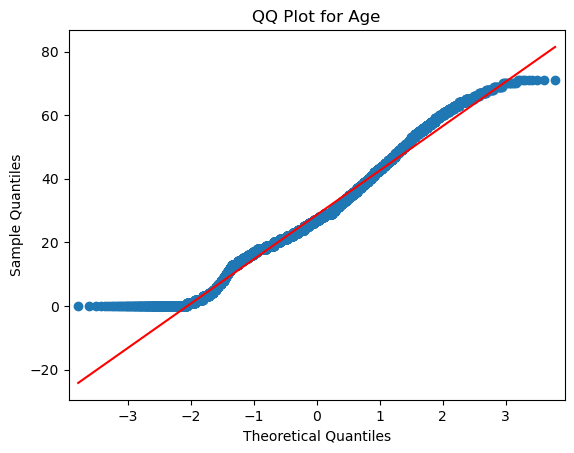

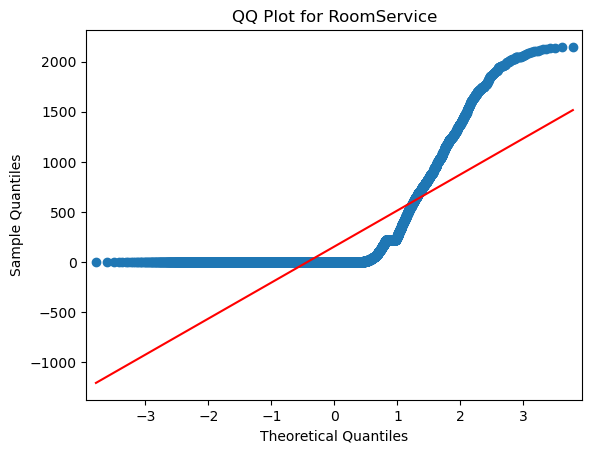

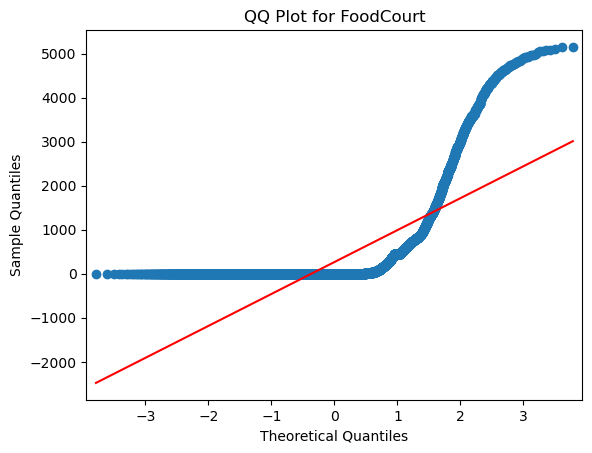

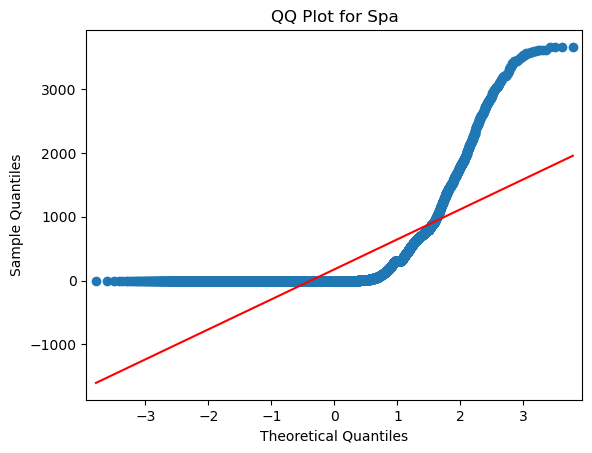

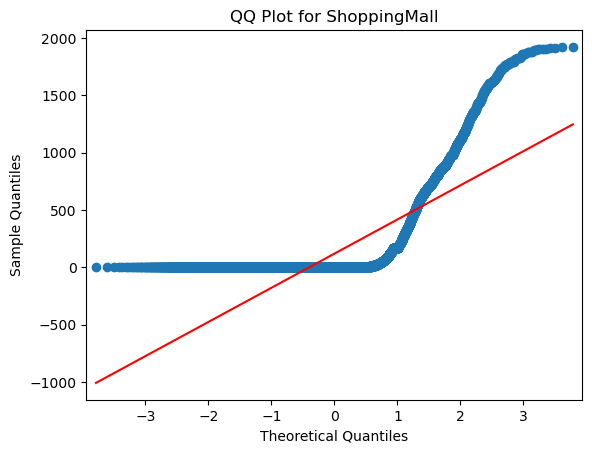

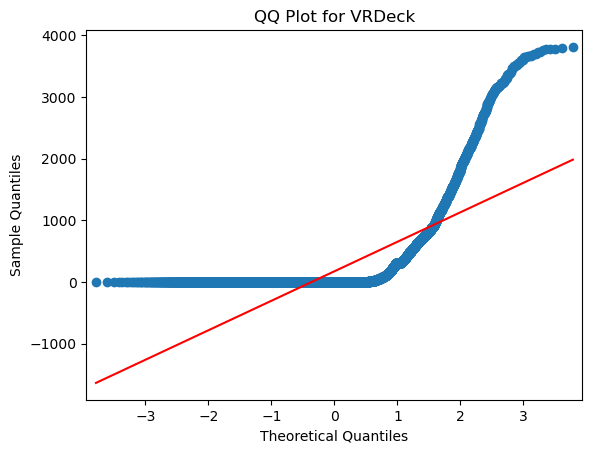

In [238]:
import statsmodels.api as sm
# Perform normality check using QQ plot
for column in numeric_columns:
    # Create QQ plot
    sm.qqplot(df2[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()

In [239]:
def transformation_numerical(col): 
    # Select only the numeric columns
    numeric_data = df2 [numeric_columns]
    # Perform logarithmic transformation on each numeric column
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)

    # Plot the original and transformed data for a single column
    column = col
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.hist(numeric_data[column], bins=20)
    plt.title(f'{column} in Original Data')
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(f'{column} in Logarithmic Transformation')
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(f'{column} in Square Root Transformation')
    plt.subplot(2, 2, 4)
    plt.hist(power_transformed_df[column], bins=20)
    plt.title(f'{column} in Power Transformation')
    plt.tight_layout()
    plt.show()


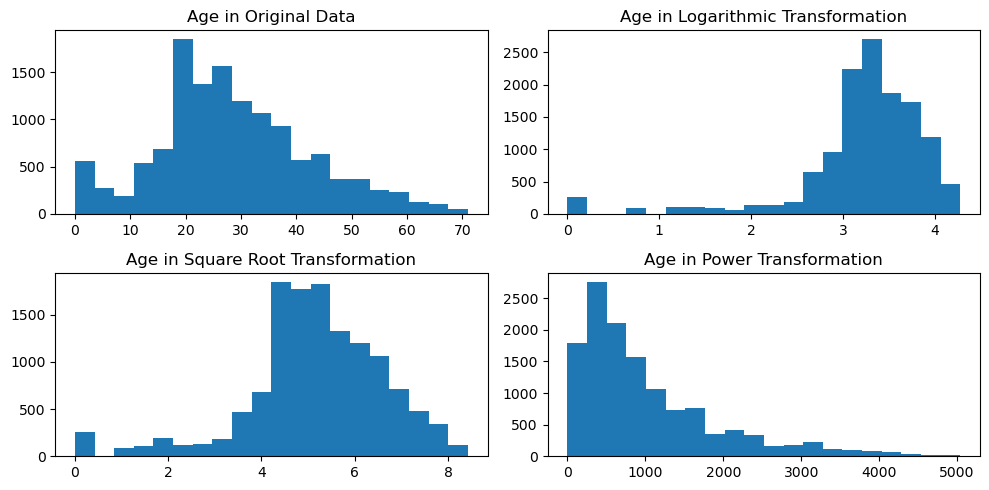

In [240]:
transformation_numerical('Age')

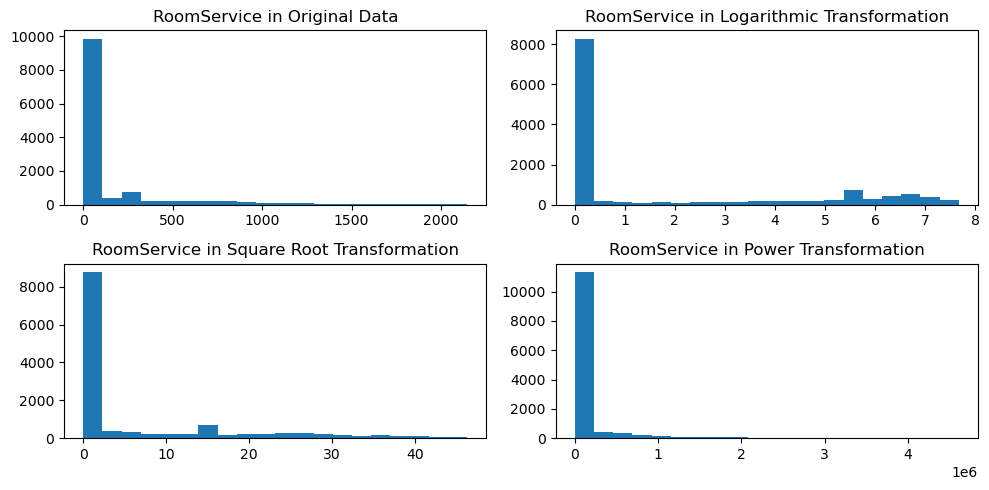

In [241]:
transformation_numerical('RoomService')

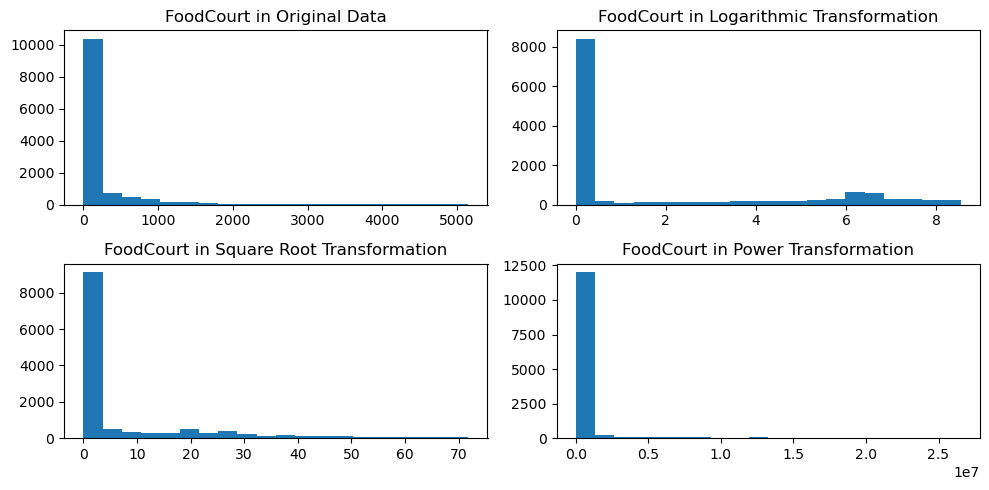

In [242]:
transformation_numerical('FoodCourt')

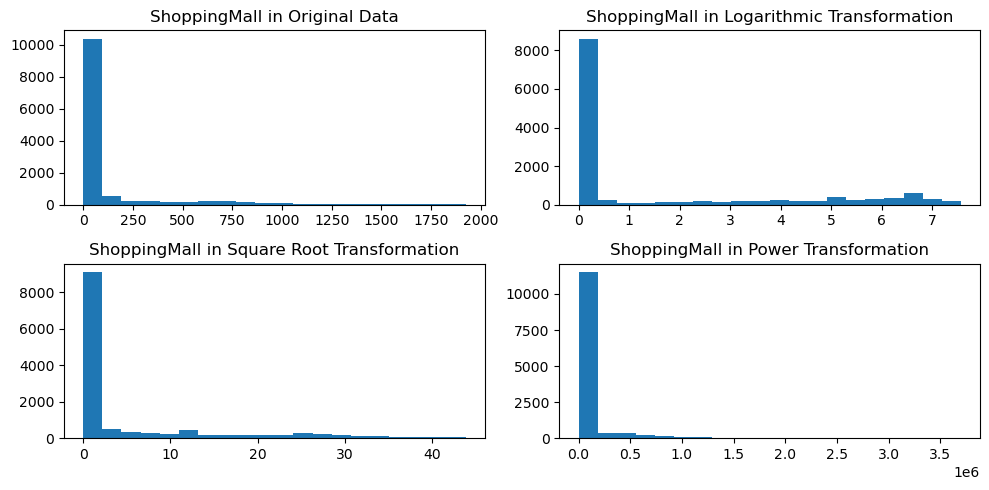

In [243]:
transformation_numerical('ShoppingMall')

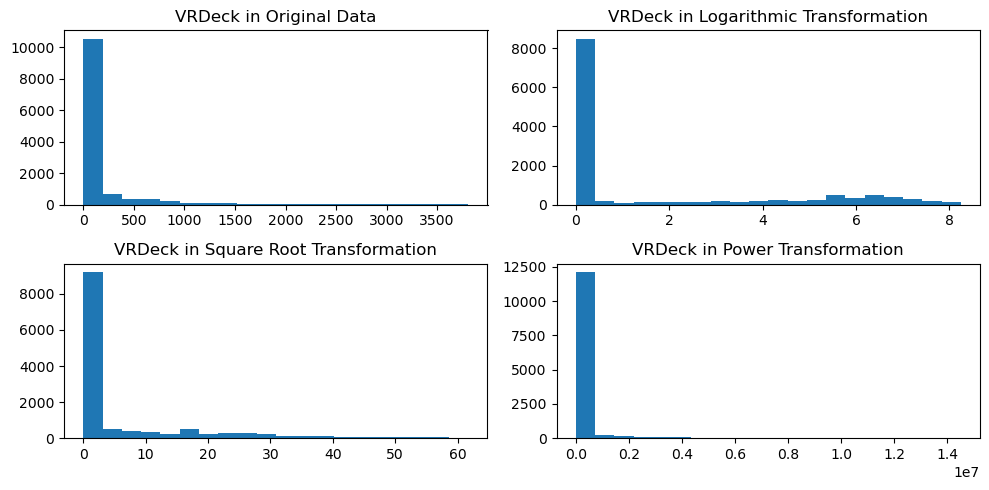

In [244]:
transformation_numerical('VRDeck')

In [245]:
numeric_columns

['Age', 'RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck']

In [246]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12942 entries, 0 to 12969
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12942 non-null  object 
 1   CryoSleep     12942 non-null  int64  
 2   Cabin         12942 non-null  object 
 3   Destination   12942 non-null  object 
 4   Age           12942 non-null  float64
 5   VIP           12942 non-null  int64  
 6   RoomService   12942 non-null  float64
 7   FoodCourt     12942 non-null  float64
 8   ShoppingMall  12942 non-null  float64
 9   Spa           12942 non-null  float64
 10  VRDeck        12942 non-null  float64
 11  Transported   12942 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.3+ MB


In [247]:
'''# Logaritmik dönüşüm yapılacak sütunları seçin
columns_to_transform = ['Age', 'RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck']  # İlgili sütun adlarını buraya ekleyin

# Logaritmik dönüşüm uygulayın ve veri çerçevesini güncelleyin
df2[columns_to_transform] = np.log1p(df2[columns_to_transform])'''

"# Logaritmik dönüşüm yapılacak sütunları seçin\ncolumns_to_transform = ['Age', 'RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck']  # İlgili sütun adlarını buraya ekleyin\n\n# Logaritmik dönüşüm uygulayın ve veri çerçevesini güncelleyin\ndf2[columns_to_transform] = np.log1p(df2[columns_to_transform])"

In [248]:
def normality_b_a_transformed(col):
    column = col
    numeric_data = df2 [numeric_columns]
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)
    
    sm.qqplot(numeric_data[column], line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

In [249]:
numeric_columns

['Age', 'RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck']

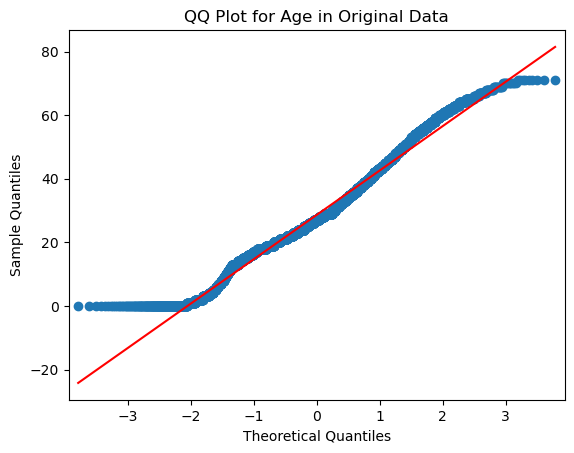

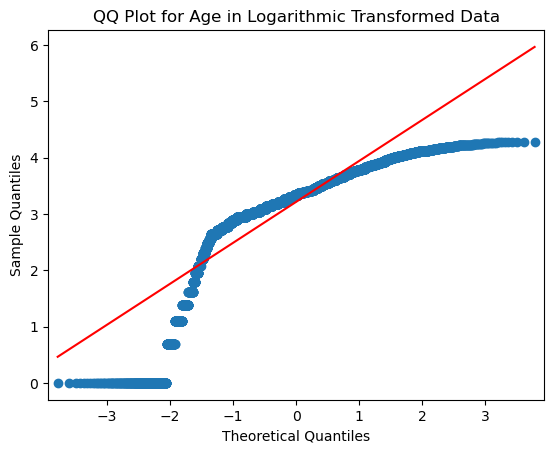

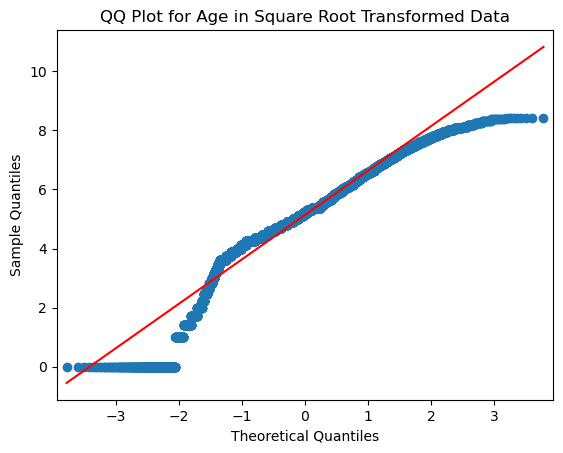

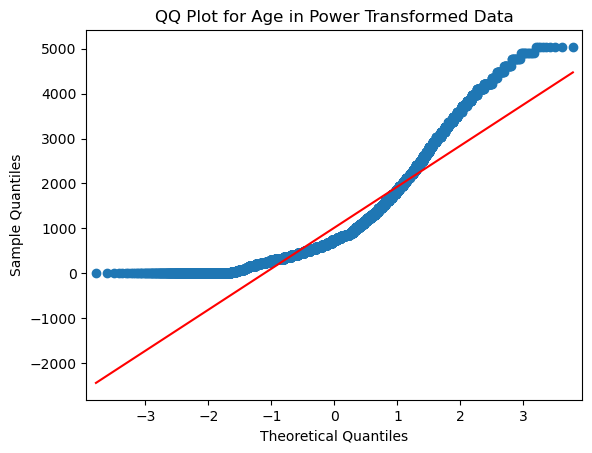

In [250]:
normality_b_a_transformed('Age')

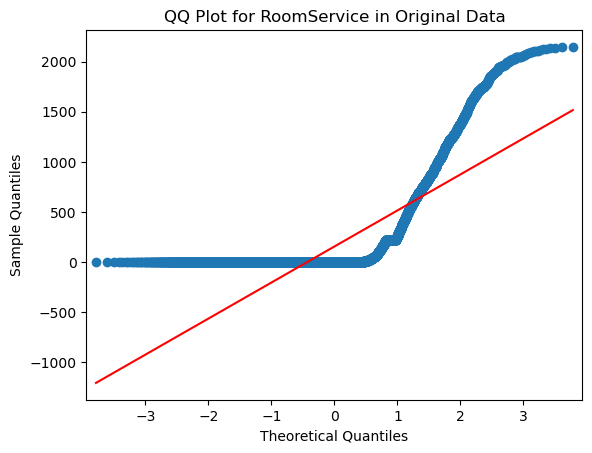

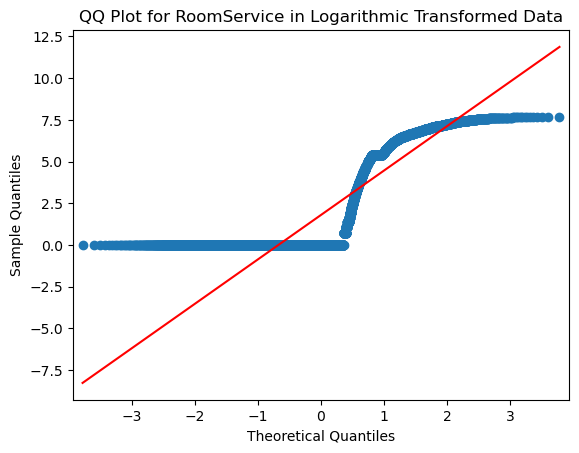

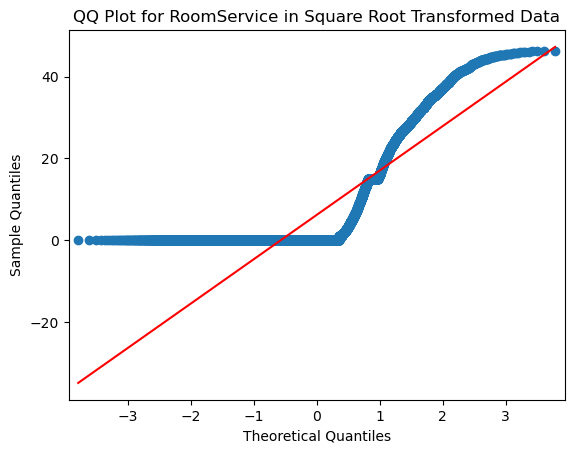

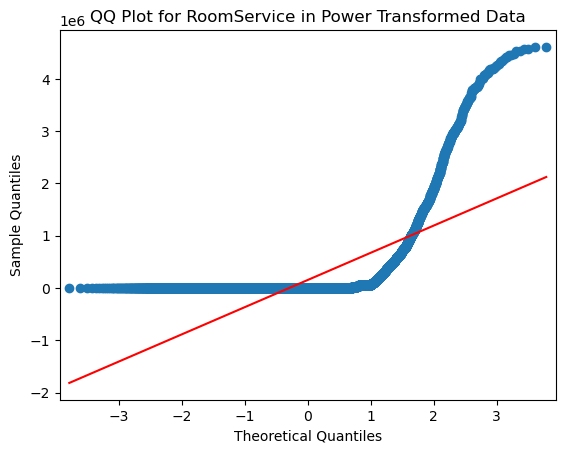

In [251]:
normality_b_a_transformed('RoomService')

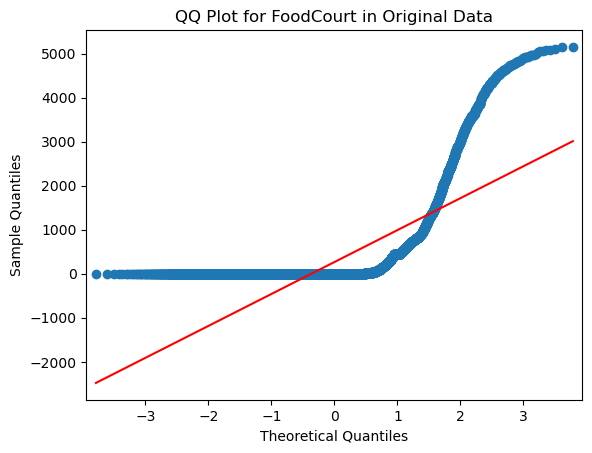

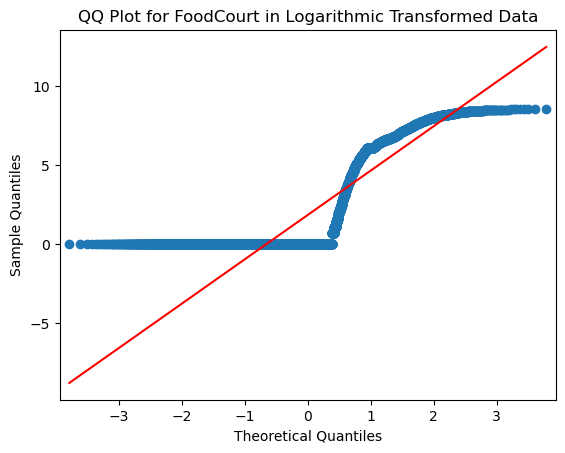

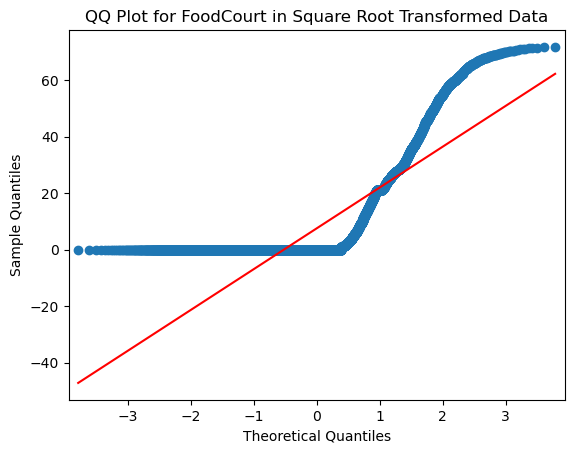

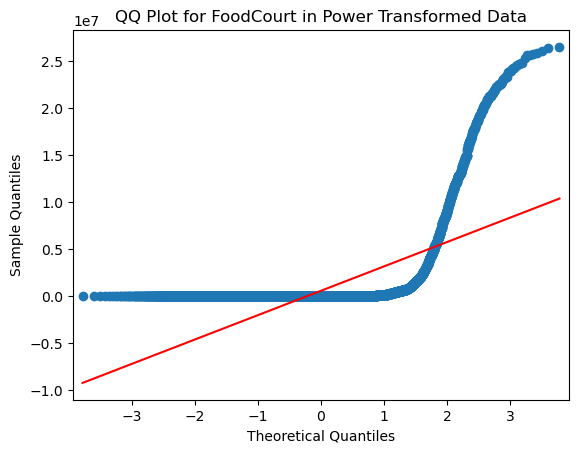

In [252]:
normality_b_a_transformed('FoodCourt')

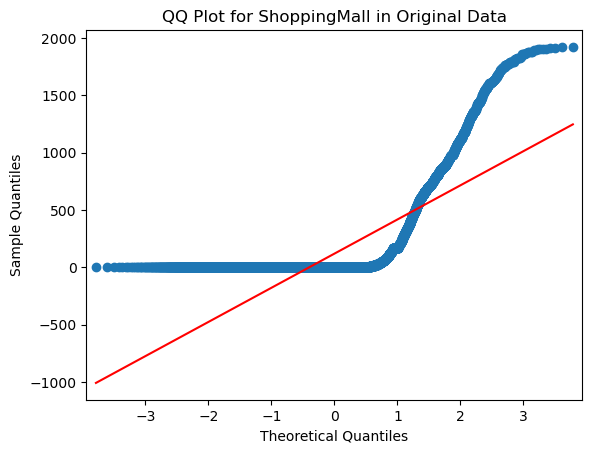

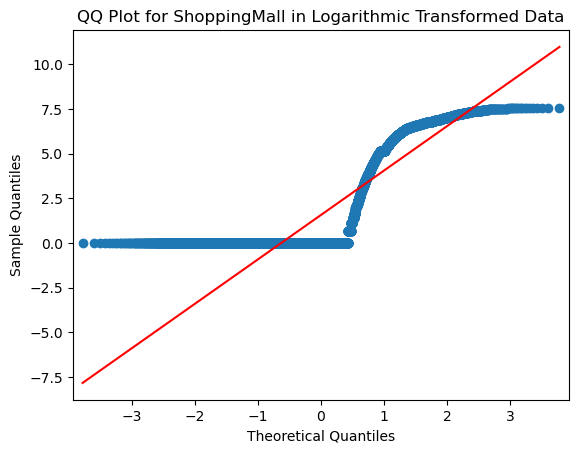

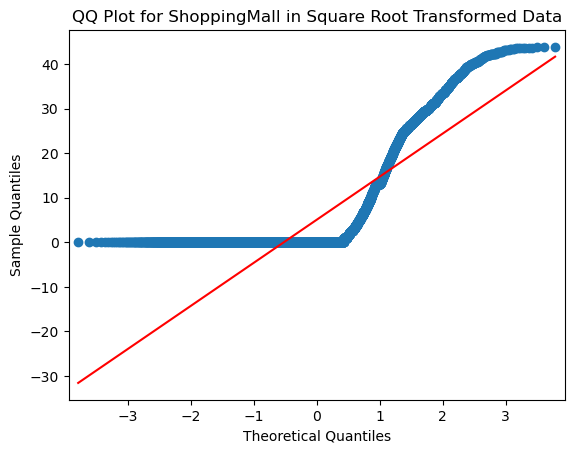

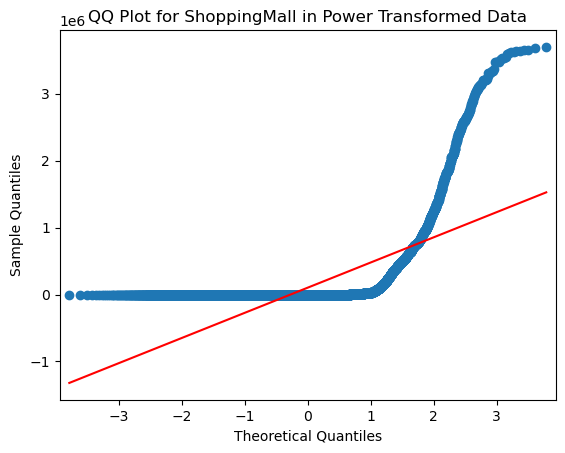

In [253]:
normality_b_a_transformed('ShoppingMall')

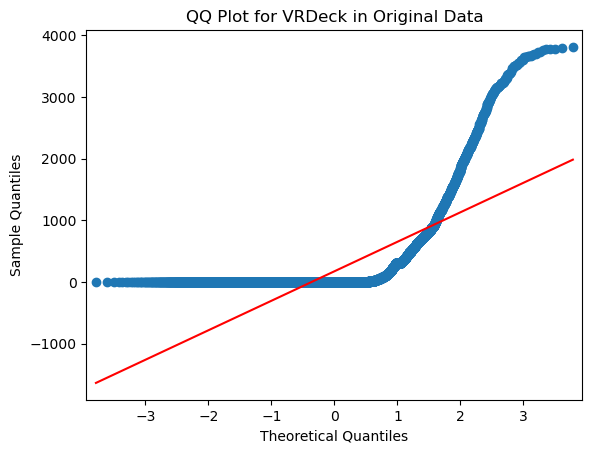

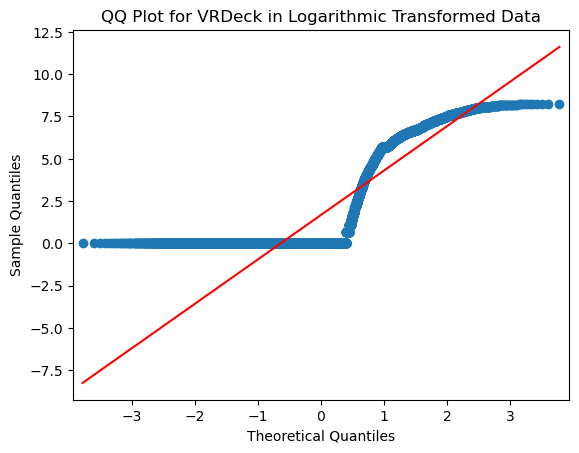

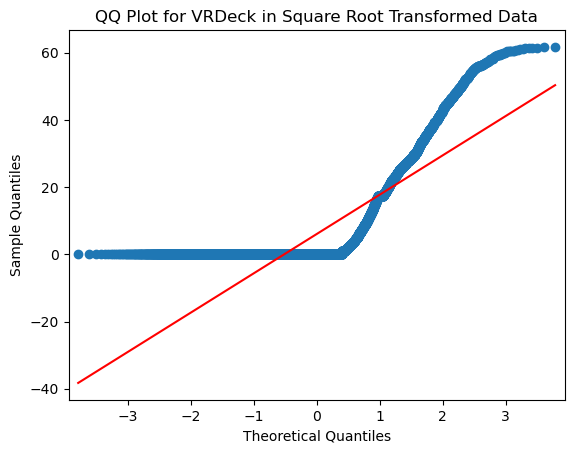

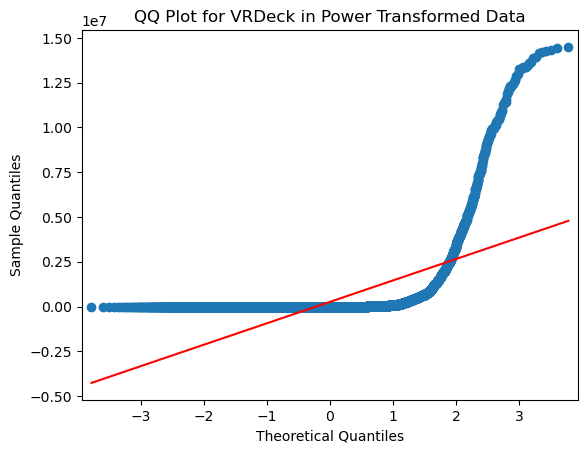

In [254]:
normality_b_a_transformed('VRDeck')

### Including Transformations

In [291]:
df3 = df2.copy()
numeric_data = df2 [numeric_columns]
log_transformed_df = np.log1p(numeric_data)
sqrt_transformed_df = np.sqrt(numeric_data)
#['Age', 'RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck']   
df3["Age"] = log_transformed_df["Age"] 
df3["RoomService"] = log_transformed_df["RoomService"] 
df3["FoodCourt"] = log_transformed_df["FoodCourt"] 
df3["Spa"] = log_transformed_df["Spa"] 
df3["ShoppingMall"] = log_transformed_df["ShoppingMall"] 
df3["VRDeck"] = log_transformed_df["VRDeck"] 



In [292]:
df3

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,3.688879,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,Earth,0,F/0/S,TRAPPIST-1e,3.218876,0,4.700480,2.302585,3.258097,6.309918,3.806662,1
2,Europa,0,A/0/S,TRAPPIST-1e,4.077537,1,3.784190,8.182280,0.000000,5.714970,3.912023,0
3,Europa,0,A/0/S,TRAPPIST-1e,3.526361,0,0.000000,7.157735,5.918894,8.110728,5.267858,0
4,Earth,0,F/1/S,TRAPPIST-1e,2.833213,0,5.717028,4.262680,5.023881,6.338594,1.098612,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,1,G/1496/S,TRAPPIST-1e,3.555348,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
12966,Earth,0,G/160/P,TRAPPIST-1e,3.761200,0,0.000000,6.742881,2.890372,2.397895,4.976734,0
12967,Mars,1,D/296/P,55 Cancri e,3.394602,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
12968,Europa,0,D/297/P,TRAPPIST-1e,3.394602,0,0.000000,7.893945,0.000000,0.000000,6.261492,0


In [294]:
from sklearn.preprocessing import MinMaxScaler

features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VIP','CryoSleep']

# Perform min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df3[features])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled, columns=features)
data_scaled.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VIP,CryoSleep
0,0.862560,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.752660,0.612657,0.269398,0.430842,0.769038,0.0,0.0
2,0.953438,0.493228,0.957312,0.000000,0.696527,1.0,0.0
3,0.824558,0.000000,0.837442,0.782699,0.988517,0.0,0.0
4,0.662482,0.745152,0.498726,0.664345,0.772533,0.0,0.0


In [295]:
df4=data_scaled

In [296]:
df4.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VIP,CryoSleep
0,0.862560,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.752660,0.612657,0.269398,0.430842,0.769038,0.0,0.0
2,0.953438,0.493228,0.957312,0.000000,0.696527,1.0,0.0
3,0.824558,0.000000,0.837442,0.782699,0.988517,0.0,0.0
4,0.662482,0.745152,0.498726,0.664345,0.772533,0.0,0.0


In [297]:
from sklearn.model_selection import train_test_split

In [298]:
#split train and test
x=df4.iloc[:,0:]
y=df2.iloc[:,11]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9059, 7) (3883, 7) (9059,) (3883,)


In [299]:
x_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VIP,CryoSleep
6684,0.837923,0.705576,0.000000,0.616681,0.084479,0.0,0.0
4404,0.700483,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7100,0.633215,0.845003,0.000000,0.212828,0.000000,0.0,0.0
7897,0.928361,0.000000,0.786676,0.970303,0.000000,1.0,0.0
11057,0.802959,0.209773,0.530306,0.680805,0.937051,0.0,0.0


In [300]:
y_train.head()

6693     0
4410     1
7110     0
7910     0
11078    0
Name: Transported, dtype: int64

In [262]:
'''df3 = df2.copy()
numeric_data = df2 [numeric_columns]
log_transformed_df = np.log1p(numeric_data)
sqrt_transformed_df = np.sqrt(numeric_data)
    
df3["Age"] = log_transformed_df["Age"] 
df3["Transported_True"] = sqrt_transformed_df["Transported_True"] '''

'df3 = df2.copy()\nnumeric_data = df2 [numeric_columns]\nlog_transformed_df = np.log1p(numeric_data)\nsqrt_transformed_df = np.sqrt(numeric_data)\n    \ndf3["Age"] = log_transformed_df["Age"] \ndf3["Transported_True"] = sqrt_transformed_df["Transported_True"] '

In [263]:
'''def split_dataset(df2, test_ratio=0.20):
  test_indices = np.random.rand(len(df2)) < test_ratio
  return df2[~test_indices], df2[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df2)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))'''

'def split_dataset(df2, test_ratio=0.20):\n  test_indices = np.random.rand(len(df2)) < test_ratio\n  return df2[~test_indices], df2[test_indices]\n\ntrain_ds_pd, valid_ds_pd = split_dataset(df2)\nprint("{} examples in training, {} examples in testing.".format(\n    len(train_ds_pd), len(valid_ds_pd)))'

In [264]:
'''from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X = data_scaled [['Age','RoomService','FoodCourt','ShoppingMall','Spa','VIP','CryoSleep']] #bagimsiz degiskenler
y = df3["Transported"] #bagimli degisken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)'''

'from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict\n\nX = data_scaled [[\'Age\',\'RoomService\',\'FoodCourt\',\'ShoppingMall\',\'Spa\',\'VIP\',\'CryoSleep\']] #bagimsiz degiskenler\ny = df3["Transported"] #bagimli degisken\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)\nprint("X_train", X_train.shape)\nprint("y_train",y_train.shape)\nprint("X_test",X_test.shape)\nprint("y_test",y_test.shape)\ntraining = df.copy()\nprint("training", training.shape)'

****models****

In [265]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

Logistic Regression

Logistic Regression
Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [399]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round( clf.score(x_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

69.05 percent


In [400]:
from sklearn.metrics import roc_auc_score, f1_score

# Lojistik Regresyon modelinin eğitimi
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Test veri seti üzerinde tahminler yapma
y_pred_log_reg = clf.predict(x_test)

# Eğitim veri seti üzerinde doğruluk oranını hesaplama
acc_log_reg = round(clf.score(x_train, y_train) * 100, 2)
print("Accuracy: " + str(acc_log_reg) + "%")

# AUC skorunu hesaplama
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC Score:", auc_log_reg)

# F1 skorunu hesaplama
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print("F1 Score:", f1_log_reg)

Accuracy: 69.05%
AUC Score: 0.6583547255734757
F1 Score: 0.5493594574227582


In [401]:
from sklearn.model_selection import GridSearchCV

# Parametrelerin olası değerlerini belirleyin
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}

# GridSearchCV ile en iyi parametre kombinasyonunu bulun
grid_search = GridSearchCV(LogisticRegression(), param_grid)
grid_search.fit(x_train, y_train)

# En iyi parametreleri ve skorunu yazdırın
print("En iyi parametreler: ", grid_search.best_params_)
print("En iyi skor: ", grid_search.best_score_)

En iyi parametreler:  {'C': 0.1, 'penalty': 'l2'}
En iyi skor:  0.6912470760608155


In [402]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score

# Parametrelerin olası değerlerini belirleyin
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}

# GridSearchCV ile en iyi parametre kombinasyonunu ve skorunu bulun
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid)
grid_search.fit(x_train, y_train)

# En iyi parametreleri ve skorunu yazdırın
print("En iyi parametreler: ", grid_search.best_params_)
print("En iyi skor: ", grid_search.best_score_)

# En iyi modeli kullanarak tahminler yapın
y_pred = grid_search.predict(x_test)

# AUC skorunu hesaplayın
auc_GridSearch = roc_auc_score(y_test, y_pred)
print("AUC Score: ", auc_GridSearch)

# F1 skorunu hesaplayın
f1_GridSearch = f1_score(y_test, y_pred)
print("F1 Score: ", f1_GridSearch)

En iyi parametreler:  {'C': 0.1, 'penalty': 'l2'}
En iyi skor:  0.6912470760608155
AUC Score:  0.6583835873365832
F1 Score:  0.5489603024574669


Support Vector Machine (SVM)

Support Vector Machine (SVM) model is a Supervised Learning model used for classification and regression analysis. It is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support vector machines, a data point is viewed as a  p
 -dimensional vector (a list of  p
  numbers), and we want to know whether we can separate such points with a  (p−1)
 -dimensional hyperplane.

When data are not labeled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The clustering algorithm which provides an improvement to the support vector machines is called support vector clustering and is often used in industrial applications either when data are not labeled or when only some data are labeled as a preprocessing for a classification pass.

In the below code, SVC stands for Support Vector Classification.

In [406]:
clf = SVC()
clf.fit(x_train, y_train)
y_pred_svc = clf.predict(x_test)
acc_svc = round(clf.score(x_train, y_train) * 100, 2)
print (acc_svc)

69.19


Linear SVM
Linear SVM is a SVM model with linear kernel.

In the below code, LinearSVC stands for Linear Support Vector Classification.
..................................

Doğrusal SVM
Doğrusal SVM, doğrusal çekirdeğe sahip bir SVM modelidir.

Aşağıdaki kodda LinearSVC, Linear Support Vector Classification anlamına gelir.

In [407]:
from sklearn.metrics import f1_score, roc_auc_score

clf = SVC()
clf.fit(x_train, y_train)
y_pred_svc = clf.predict(x_test)
acc_svc = round(clf.score(x_train, y_train) * 100, 2)
print(acc_svc)

# F1 skorunu hesaplayın
f1_svc = f1_score(y_test, y_pred_svc)
print("F1 Score: ", f1_svc)

# AUC skorunu hesaplayın
auc_svc = roc_auc_score(y_test, y_pred_svc)
print("AUC Score: ", auc_svc)

69.19
F1 Score:  0.5558460963765408
AUC Score:  0.662495574529657


In [408]:
clf = LinearSVC()
clf.fit(x_train, y_train)
y_pred_linear_svc = clf.predict(x_test)
acc_linear_svc = round(clf.score(x_train, y_train) * 100, 2)
print (acc_linear_svc)

69.11


In [409]:
from sklearn.metrics import f1_score, roc_auc_score

clf = SVC()
clf.fit(x_train, y_train)
y_pred_svc = clf.predict(x_test)
acc_svc = round(clf.score(x_train, y_train) * 100, 2)
print(acc_svc)

# F1 skorunu hesaplayın
f1_linear_svc = f1_score(y_test, y_pred_svc)
print("F1 Score: ", f1)

# AUC skorunu hesaplayın
auc_linear_svc = roc_auc_score(y_test, y_pred_svc)
print("AUC Score: ", auc_score)

69.19
F1 Score:  0.7566265060240963
AUC Score:  0.6589486858573217


k
 -Nearest Neighbors
 
k
-nearest neighbors algorithm (k-NN) is one of the simplest machine learning algorithms and is used for classification and regression. In both cases, the input consists of the k
 closest training examples in the feature space. The output depends on whether k
-NN is used for classification or regression:

In k
-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k
 nearest neighbors (k
 is a positive integer, typically small). If k=1
, then the object is simply assigned to the class of that single nearest neighbor.
In k
-NN regression, the output is the property value for the object. This value is the average of the values of its k
 nearest neighbors.
 ...............................................................
 k
  -En Yakın Komşular
k
-en yakın komşular algoritması (k-NN), en basit makine öğrenmesi algoritmalarından biridir ve sınıflandırma ve regresyon için kullanılır. Her iki durumda da, girdi k
  özellik uzayındaki en yakın eğitim örnekleri. Çıktı k olup olmadığına bağlıdır
-NN, sınıflandırma veya regresyon için kullanılır:

k olarak
-NN sınıflandırması, çıktısı bir sınıf üyeliğidir. Bir nesne, komşularının çoğunluk oyu ile sınıflandırılır ve nesne, k sınıfı arasında en yaygın olan sınıfa atanır.
  en yakın komşular (k
  pozitif bir tamsayıdır, tipik olarak küçüktür). k=1 ise
, o zaman nesne basitçe o tek en yakın komşunun sınıfına atanır.
k olarak
-NN regresyon, çıktı nesne için özellik değeridir. Bu değer, k değerlerinin ortalamasıdır.
  en yakın komşular

In [410]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train)
y_pred_knn = clf.predict(x_test)
acc_knn = round(clf.score(x_train, y_train) * 100, 2)
print (acc_knn)

71.98


In [411]:
from sklearn.metrics import f1_score, roc_auc_score

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_pred_knn = clf.predict(x_test)
acc_knn = round(clf.score(x_train, y_train) * 100, 2)
print(acc_knn)

# F1 skorunu hesaplayın
f1_knn = f1_score(y_test, y_pred_knn)
print("F1 Score: ", f1_knn)

# AUC skorunu hesaplayın
auc_knn = roc_auc_score(y_test, y_pred_knn)
print("AUC Score: ", auc_knn)

71.98
F1 Score:  0.4794520547945205
AUC Score:  0.6148445076212816


Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.
..............................................
Karar ağacı
Bir karar ağacı, her dahili düğümün bir öznitelik üzerinde bir "testi" temsil ettiği (örneğin, yazı-turanın tura mı geldiği), her dalın testin sonucunu temsil ettiği ve her yaprak düğümün bir sonucu temsil ettiği akış şeması benzeri bir yapıdır. sınıf etiketi (tüm öznitelikleri hesapladıktan sonra alınan karar). Kökten yaprağa giden yollar, sınıflandırma kurallarını temsil eder.

In [412]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_decision_tree = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)
print (acc_decision_tree)

82.18


In [413]:
from sklearn.metrics import f1_score, roc_auc_score

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_decision_tree = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

# F1 skorunu hesaplayın
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
print("F1 Score: ", f1_decision_tree)

# AUC skorunu hesaplayın
auc_decision_tree = roc_auc_score(y_test, y_pred_decision_tree)
print("AUC Score: ", auc_decision_tree)


82.18
F1 Score:  0.48056801195814647
AUC Score:  0.6046437244758407


Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.
..............................................
Rastgele Orman
Rastgele ormanlar veya rastgele karar ormanları, eğitim zamanında çok sayıda karar ağacı oluşturarak ve sınıfların modu (sınıflandırma) veya ortalama tahmin (gerileme) olan sınıfın çıktısını alarak çalışan, sınıflandırma, gerileme ve diğer görevler için bir topluluk öğrenme yöntemidir. ) bireysel ağaçların. Rastgele karar ormanları, karar ağaçlarının eğitim setlerine fazla uyma alışkanlığını düzeltir.

Topluluk yöntemleri, yalnızca kurucu öğrenme algoritmalarının herhangi birinden elde edilebilecek olandan daha iyi tahmin performansı elde etmek için çoklu öğrenme algoritmaları kullanır.

In [414]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred_random_forest = clf.predict(x_test)
acc_random_forest = round(clf.score(x_train, y_train) * 100, 2)
print (acc_random_forest)

82.17


In [415]:
from sklearn.metrics import f1_score, roc_auc_score

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred_random_forest = clf.predict(x_test)
acc_random_forest = round(clf.score(x_train, y_train) * 100, 2)
print(acc_random_forest)

# F1 skorunu hesaplayın
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("F1 Score: ", f1_random_forest)

# AUC skorunu hesaplayın
auc_random_forest = roc_auc_score(y_test, y_pred_random_forest)
print("AUC Score: ", auc_random_forest)

82.16
F1 Score:  0.5109845402766477
AUC Score:  0.638484955768978


Gaussian Naive Bayes

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.
..........................................
Gauss Saf Bayes
Naive Bayes sınıflandırıcıları, özellikler arasında güçlü (naif) bağımsızlık varsayımlarıyla Bayes teoreminin uygulanmasına dayanan basit bir olasılıksal sınıflandırıcı ailesidir.

Bayes teoremi (alternatif olarak Bayes yasası veya Bayes kuralı), olayla ilgili olabilecek koşullara ilişkin ön bilgilere dayalı olarak bir olayın olasılığını tanımlar. Örneğin, kanser yaşla ilgiliyse, o zaman Bayes teoremi kullanılarak, bir kişinin yaşı, kişinin yaşı bilinmeden yapılan kanser olasılığı değerlendirmesine kıyasla, kanser olma olasılığını daha doğru bir şekilde değerlendirmek için kullanılabilir. .

Naive Bayes, sınıflandırıcılar oluşturmak için basit bir tekniktir: sınıf etiketlerinin bazı sonlu kümelerden çekildiği, özellik değerlerinin vektörleri olarak temsil edilen problem örneklerine sınıf etiketleri atayan modeller. Bu tür sınıflandırıcıları eğitmek için tek bir algoritma değil, ortak bir ilkeye dayanan bir algoritmalar ailesidir: tüm saf Bayes sınıflandırıcıları, belirli bir özelliğin değerinin, sınıf değişkeni verildiğinde, diğer herhangi bir özelliğin değerinden bağımsız olduğunu varsayar. Örneğin, kırmızı, yuvarlak ve yaklaşık 10 cm çapında bir meyve elma olarak kabul edilebilir. Naif bir Bayes sınıflandırıcısı, bu özelliklerin her birinin, renk, yuvarlaklık ve çap özellikleri arasındaki olası herhangi bir korelasyondan bağımsız olarak, bu meyvenin bir elma olma olasılığına bağımsız olarak katkıda bulunduğunu düşünür.


In [416]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred_gnb = clf.predict(x_test)
acc_gnb = round(clf.score(x_train, y_train) * 100, 2)
print (acc_gnb)

67.06


In [417]:
from sklearn.metrics import f1_score, roc_auc_score

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred_gnb = clf.predict(x_test)
acc_gnb = round(clf.score(x_train, y_train) * 100, 2)
print(acc_gnb)

# F1 skorunu hesaplayın
f1_gnb = f1_score(y_test, y_pred_gnb)
print("F1 Score: ", f1_gnb)

# AUC skorunu hesaplayın
auc_gnb = roc_auc_score(y_test, y_pred_gnb)
print("AUC Score: ", auc_gnb)

67.06
F1 Score:  0.5836443841194435
AUC Score:  0.6765724184558987


Perceptron

Perceptron is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.
..................
Algılayıcı
Perceptron, bir tür doğrusal sınıflandırıcıdır, yani tahminlerini bir dizi ağırlık ile özellik vektörünü birleştiren doğrusal bir tahmin işlevine dayalı olarak tahminlerini yapan bir sınıflandırma algoritmasıdır.

In [379]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(x_train, y_train)
y_pred_perceptron = clf.predict(x_test)
acc_perceptron = round(clf.score(x_train, y_train) * 100, 2)
print (acc_perceptron)

55.7


Perceptron sınıflandırıcısı için F1 skoru ve AUC değerini hesaplamak biraz farklıdır. Perceptron, olasılık tahminleri sağlamaz ve çok sınıflı problemlerde kullanılmak üzere optimize edilmemiştir. Ancak, doğruluk skoru gibi değerlendirme metriklerini kullanabiliriz. F1 skoru ve AUC değeri hesaplaması Perceptron için uygun olmayabilir. 

Stochastic Gradient Descent (SGD)

Stochastic gradient descent (often shortened in SGD), also known as incremental gradient descent, is a stochastic approximation of the gradient descent optimization method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.
...............................
Stokastik Gradyan İnişi (SGD)
Artımlı gradyan inişi olarak da bilinen stokastik gradyan inişi (genellikle SGD'de kısaltılır), türevlenebilir fonksiyonların toplamı olarak yazılan bir amaç fonksiyonunu en aza indirmek için gradyan iniş optimizasyon yönteminin stokastik bir yaklaşımıdır. Başka bir deyişle, SGD yineleme yoluyla minimum veya maksimum bulmaya çalışır.

In [419]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(x_train, y_train)
y_pred_sgd = clf.predict(x_test)
acc_sgd = round(clf.score(x_train, y_train) * 100, 2)
print (acc_sgd)

69.19


In [420]:
from sklearn.metrics import f1_score, roc_auc_score

clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(x_train, y_train)
y_pred_sgd = clf.predict(x_test)
acc_sgd = round(clf.score(x_train, y_train) * 100, 2)
print(acc_sgd)

# F1 skorunu hesaplayın
f1_sgd = f1_score(y_test, y_pred_sgd)
print("F1 Score: ", f1_sgd)

# AUC skorunu hesaplayın
auc_sgd = roc_auc_score(y_test, y_pred_sgd)
print("AUC Score: ", auc_sgd)

62.18
F1 Score:  0.15878378378378377
AUC Score:  0.49143664088151817


Confusion Matrix

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).

In predictive analytics, a table of confusion (sometimes also called a confusion matrix), is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy). Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). For example, if there were 95 cats and only 5 dogs in the data set, a particular classifier might classify all the observations as cats. The overall accuracy would be 95%, but in more detail the classifier would have a 100% recognition rate for the cat class but a 0% recognition rate for the dog class.

Here's another guide explaining Confusion Matrix with example.
                PredictedPositive   PredictedNegative
ActualPositive      TP                  FN
ActualNegative      FP                  TN
 
In our (Titanic problem) case:

True Positive: The classifier predicted Survived and the passenger actually Survived.

True Negative: The classifier predicted Not Survived and the passenger actually Not Survived.

False Postiive: The classifier predicted Survived but the passenger actually Not Survived.

False Negative: The classifier predicted Not Survived but the passenger actually Survived.

In the example code below, we plot a confusion matrix for the prediction of Random Forest Classifier on our training dataset. This shows how many entries are correctly and incorrectly predicted by our classifer.
::::::::::::::::::::::::::::::
Karışıklık Matrisi

Hata matrisi olarak da bilinen karışıklık matrisi, bir algoritmanın performansının görselleştirilmesini sağlayan özel bir tablo düzenidir. Matrisin her satırı, tahmin edilen bir sınıftaki örnekleri temsil ederken, her sütun gerçek bir sınıftaki örnekleri temsil eder (veya tersi). Ad, sistemin iki sınıfı karıştırıp karıştırmadığını (yani genellikle birini diğeriyle yanlış etiketleme) görmeyi kolaylaştırmasından kaynaklanmaktadır.

Tahmine dayalı analitikte, bir karışıklık tablosu (bazen bir karışıklık matrisi olarak da adlandırılır), yanlış pozitiflerin, yanlış negatiflerin, gerçek pozitiflerin ve gerçek negatiflerin sayısını bildiren iki satır ve iki sütun içeren bir tablodur. Bu, doğru sınıflandırmaların (doğruluk) yalnızca oranından daha ayrıntılı analize izin verir. Doğruluk, bir sınıflandırıcının gerçek performansı için güvenilir bir ölçü değildir, çünkü veri seti dengesizse (yani, farklı sınıflardaki gözlem sayıları büyük ölçüde değiştiğinde) yanıltıcı sonuçlar verecektir. Örneğin, veri setinde 95 kedi ve sadece 5 köpek varsa, belirli bir sınıflandırıcı tüm gözlemleri kedi olarak sınıflandırabilir. Genel doğruluk %95 olacaktır, ancak daha ayrıntılı olarak sınıflandırıcının kedi sınıfı için %100 tanıma oranı, köpek sınıfı için ise %0 tanıma oranı olacaktır.

İşte Karışıklık Matrisini örnekle açıklayan başka bir rehber.
                 ÖngörülenPozitif ÖngörülenNegatif
Gerçek Pozitif TP FN
Gerçek Negatif FP TN
 
Bizim (Titanik problemimiz) durumumuzda:

Gerçek Pozitif: Sınıflandırıcı, Hayatta Kaldığını ve yolcunun gerçekten Hayatta Kaldığını tahmin etti.

Gerçek Negatif: Sınıflandırıcı Hayatta Kalmadı ve yolcu aslında Hayatta Kalmadı tahmininde bulundu.

Yanlış Pozitif: Sınıflandırıcı Hayatta Kaldı tahmininde bulundu, ancak yolcu aslında Hayatta Kalmadı.

Yanlış Negatif: Sınıflandırıcı Hayatta Kalmadı tahmininde bulundu ancak yolcu gerçekten Hayatta Kaldı.

Aşağıdaki örnek kodda, eğitim veri kümemizde Rastgele Orman Sınıflandırıcısının tahmini için bir karışıklık matrisi çiziyoruz. Bu, sınıflandırıcımız tarafından kaç girişin doğru ve yanlış tahmin edildiğini gösterir.
::::::::::::::::::::::::::::::

Comparing Models
Let's compare the accuracy score of all the classifier models used above.

Accuracy: 82 % 

Confusion Matrix in Numbers
[[5005 1007]
 [ 608 2439]]

F1 Score:  0.7566265060240963
AUC Score:  0.6589486858573217

Confusion Matrix in Percentage
[[0.83 0.17]
 [0.2  0.8 ]]



<Axes: >

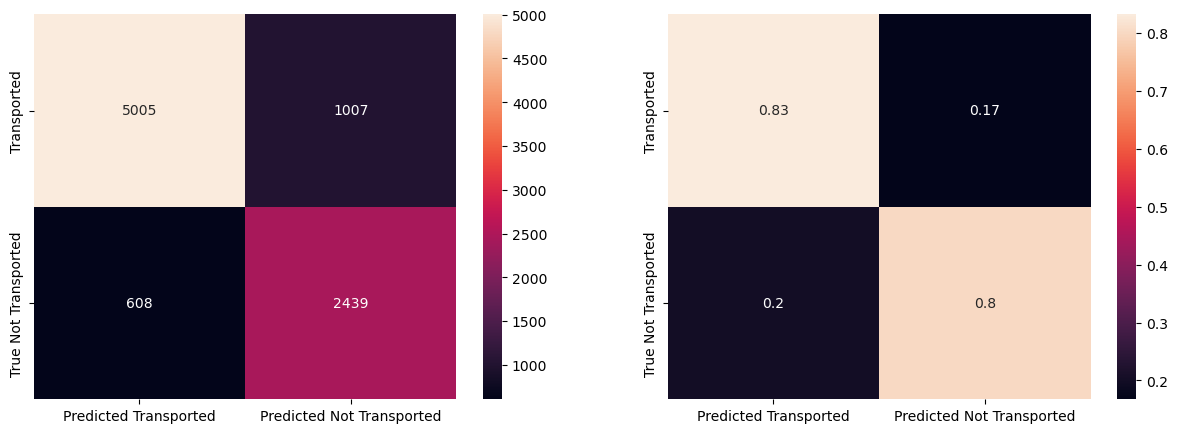

In [389]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred_random_forest_training_set = clf.predict(x_train)
acc_random_forest = round(clf.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Transported', 'Not Transported']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

# Compute F1 score
f1_random_forest= f1_score(y_train, y_pred_random_forest_training_set)
print("F1 Score: ", f1)

# Compute AUC score
auc_random_forest = roc_auc_score(y_train, y_pred_random_forest_training_set)
print("AUC Score: ", auc_score)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['Transported', 'True Not Transported']
predicted_class_names = ['Predicted Transported', 'Predicted Not Transported']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sb.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sb.heatmap(df_cnf_matrix_percent, annot=True)


In [423]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,82.18
5,Random Forest,82.16
3,KNN,71.98
1,Support Vector Machines,69.19
2,Linear SVC,69.11
0,Logistic Regression,69.05
6,Naive Bayes,67.06
8,Stochastic Gradient Decent,62.18
7,Perceptron,55.70


In [427]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Accuracy': [acc_log_reg, acc_svc, acc_linear_svc, 
                 acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
                 acc_perceptron, acc_sgd],
    
   'F1 Score': [f1_log_reg,f1_GridSearch, f1_svc, f1_linear_svc, 
                 f1_knn,  f1_decision_tree, f1_random_forest, f1_gnb, f1_sgd],
    
    'AUC': [auc_log_reg, auc_svc, auc_linear_svc, 
            auc_knn,  auc_decision_tree, auc_random_forest, auc_gnb, auc_sgd,auc_GridSearch]
})

models.sort_values(by='F1 Score', ascending=False)



,Model,Accuracy,F1 Score,AUC
7,Perceptron,55.70,0.583644,0.491437
2,Linear SVC,69.11,0.555846,0.662496
3,KNN,71.98,0.555846,0.614845
0,Logistic Regression,69.05,0.549359,0.658355
1,Support Vector Machines,69.19,0.548960,0.662496
6,Naive Bayes,67.06,0.510985,0.676572
5,Random Forest,82.16,0.480568,0.638485
4,Decision Tree,82.18,0.479452,0.604644
8,Stochastic Gradient Decent,62.18,0.158784,0.658384


In [428]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Accuracy': [acc_log_reg, acc_svc, acc_linear_svc, 
                 acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
                 acc_perceptron, acc_sgd],
    
   'F1 Score': [f1_log_reg,f1_GridSearch, f1_svc, f1_linear_svc, 
                 f1_knn,  f1_decision_tree, f1_random_forest, f1_gnb, f1_sgd],
    
    'AUC': [auc_log_reg, auc_svc, auc_linear_svc, 
            auc_knn,  auc_decision_tree, auc_random_forest, auc_gnb, auc_sgd,auc_GridSearch]
})


models.sort_values(by='AUC', ascending=False)


,Model,Accuracy,F1 Score,AUC
6,Naive Bayes,67.06,0.510985,0.676572
1,Support Vector Machines,69.19,0.548960,0.662496
2,Linear SVC,69.11,0.555846,0.662496
8,Stochastic Gradient Decent,62.18,0.158784,0.658384
0,Logistic Regression,69.05,0.549359,0.658355
5,Random Forest,82.16,0.480568,0.638485
3,KNN,71.98,0.555846,0.614845
4,Decision Tree,82.18,0.479452,0.604644
7,Perceptron,55.70,0.583644,0.491437
